In [3]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import math


In [4]:
FILE_NUMBER = 5
FOLDER_NUMBER = 7554

In [5]:
def load_image_data():
    file_name = './data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    return (pd.read_csv(file_name + '.csv'), file_name + '.png') 

In [6]:
(df, img) = load_image_data()
df.head(10)

,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749
3,609.03568541402,833.323017,0.107652,-3959.0,-670.0,00:02.7741475
4,608.719713592794,833.586326,0.129381,-4059.0,-694.0,00:02.7898665
5,608.087769950341,833.428340,0.155505,-4059.0,-694.0,00:02.8053975
6,607.403164337683,833.533664,0.201160,-4059.0,-694.0,00:02.8210195
7,607.139854486661,833.428340,0.255360,-4059.0,-694.0,00:02.8366478
8,606.455248874004,832.796397,0.312734,-4109.0,-706.0,00:02.8522656
9,606.191939022982,830.584594,0.388907,-4109.0,-706.0,00:02.8678910


In [7]:
def col_X_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
    
    if re.search("^[a-zA-Z]", data_as_str) is not None:
        return defualt_value
    return float(data_as_str)


In [8]:
def col_Y_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str

    return float(data_as_str)



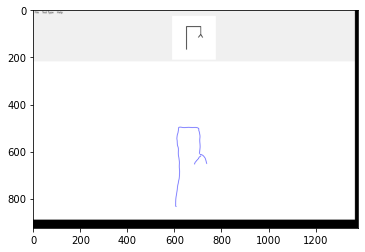

In [9]:
img1 = mpimg.imread('./data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)+".png")
plt.imshow(img1)

In [10]:
(float(df['X'][0]) + 0.2 * float(df[' Pressure'][0]))
(float(df['X'][2])) - (float(df['X'][1]))

0.0

In [11]:
df[' Time'][0]
def to_number(date_as_str, defualt_value):
    if not date_as_str:
        return defualt_value
    
    if type(date_as_str) == float:
        return date_as_str
    
    (p1, p2) = date_as_str.split(':')
    p1 = float(p1)
    p2 = float(p2)
    return p1 * 60 + p2

In [12]:
df["Time"] = df[" Time"]
df["Time"][0] = to_number(df["Time"][0], 0)
df["Y"] = df[" Y"]
df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
df["X"][0] = col_X_ToNum(df["X"][0], 0)


flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["Time"][index] = to_number(df["Time"][index], df["Time"][index - 1])
        df["Y"][index] = col_Y_ToNum(df["Y"][index], df["Y"][index - 1])
        df["X"][index] = col_X_ToNum(df["X"][index], df["X"][index - 1])

df["X"]

C:\Users\moria\AppData\Local\Temp\ipykernel_44508\2886399278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"][0] = to_number(df["Time"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_44508\2886399278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_44508\2886399278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["X"][0] = col

0       608.35108
1        608.8777
2        608.8777
3      609.035685
4      608.719714
          ...    
500     686.13281
501     686.13281
502    686.448782
503    686.448782
504    686.448782
Name: X, Length: 505, dtype: object

In [13]:
df["Y"]

0      833.323017
1      833.165031
2      833.165031
3      833.323017
4      833.586326
          ...    
500    654.061670
501    654.061670
502    653.903684
503           NaN
504           NaN
Name: Y, Length: 505, dtype: float64

In [14]:
df["Time"]

0       2.727287
1       2.742911
2       2.758575
3       2.774148
4       2.789867
         ...    
500    16.473359
501    16.489129
502    16.504605
503          NaN
504          NaN
Name: Time, Length: 505, dtype: object

C:\Users\moria\AppData\Local\Temp\ipykernel_44508\2845424429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][0] = 0
C:\Users\moria\AppData\Local\Temp\ipykernel_44508\2845424429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
c:\Users\moria\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._

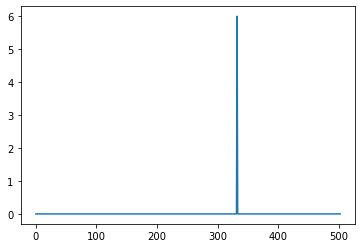

In [15]:
df["TimeDiff"] = np.full(len(df.index), 0)
df["TimeDiff"][0] = 0
flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
        

plt.plot(df["TimeDiff"])

## Q.1.

Counting lines

* First try using slopes

In [22]:
def calculate_slope(df, up_i):
    if (df['X'][up_i]-df['X'][0]) == 0:
        slp = 0
    else:
        slp = (df['Y'][up_i]-df['Y'][0])/(df['X'][up_i]-df['X'][0])
    return slp

In [29]:
UP_I = 5

def lines_cords(df):
    slp = calculate_slope(df, UP_I)
    lines = []
    prev = 0
    i = 0
    current_slp = slp
    while (i+UP_I)<len(df):
        if (df['Y'][i]!= df['Y'][i+UP_I]) & (df['X'][i]!= df['X'][i+UP_I]):
            current_slp = (df['Y'][i+UP_I]-df['Y'][i])/(df['X'][i+UP_I]-df['X'][i])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if i-prev>60:
                lines.append({ 'start' : prev, 'end' : i })
                prev = i                    
        slp = current_slp
        i+=1
    
    return lines

In [30]:
lines = lines_cords(df)
print("num of lines: ",len(lines))

num of lines:  6


* Second try using time difference

In [106]:
# def Count_lines_time(df):
#     if (df['X'][1]-df['X'][0]) ==0:
#         slp = 0
#     else:
#         slp = (df['Y'][1]-df['Y'][0])/(df['X'][1]-df['X'][0])
    
#     numOfLines = 0
#     prev = 0
#     i = 0
#     current_slp = slp
#     while (i+1)<len(df):
#         if (df['Y'][i]!= df['Y'][i+1]) & (df['X'][i]!= df['X'][i+1]):
#             current_slp = (df['Y'][i+1]-df['Y'][i])/(df['X'][i+1]-df['X'][i])    
#         if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
#             slp = current_slp
#         else:
#             if i-prev>60:
#                 print("current_slp:   ", current_slp)
#                 print("slp:   ", slp)
#                 numOfLines +=1
#                 prev = i                    
#         slp = current_slp
#         i+=1
    
#     return numOfLines

## Q.2.

Compute the length of each line and the avarage pressure applied by clicking on each line

In [83]:
def avg_pressure(df, start, end):
    sum_pressures = 0
    for j in range(start, end):
        sum_pressures += float(df[" Pressure"][j])
    return sum_pressures/(end - start)


In [86]:
def Lengths_of_lines(df):
    for i in lines:
        start = i['start']
        end = i['end']
        avg_pressure_data = avg_pressure(df, start, end)
        dist = math.dist([df['X'][start] , df['Y'][start]],[df['X'][end], df['Y'][end]])
        print("Length is " , dist , ", Avarage pressure is " , avg_pressure_data )
        print('-------------------')


In [87]:
Lengths_of_lines(df)

sum_pressures:   29.595711939036843
Length is  156.14043268247272 , Avarage pressure is  0.485175605557981
-------------------
sum_pressures:   36.90051168203354
Length is  131.89118683068415 , Avarage pressure is  0.6049264210169433
-------------------
sum_pressures:   86.53632462024689
Length is  101.86307579205834 , Avarage pressure is  0.6270748160887456
-------------------
sum_pressures:   38.41493934392929
Length is  99.61224300434327 , Avarage pressure is  0.6297531039988409
-------------------
sum_pressures:   23.720103725790977
Length is  42.87738778272278 , Avarage pressure is  0.30025447754165796
-------------------
sum_pressures:   24.52228592336178
Length is  40.99946612468629 , Avarage pressure is  0.3606218518141438
-------------------


<AxesSubplot:>

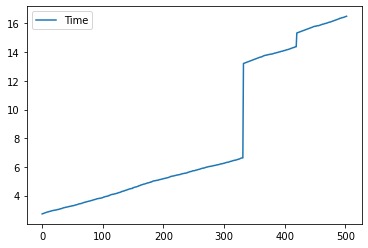

In [117]:
pd.DataFrame({ 'Time':df['Time']}).plot()

<AxesSubplot:>

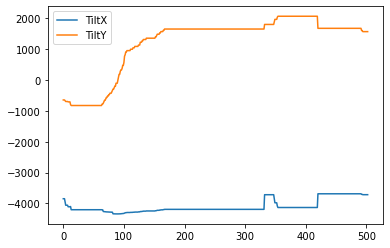

In [119]:
pd.DataFrame({ 'TiltX':df[' TiltX'], 'TiltY':df[' TiltY']}).plot()

<AxesSubplot:>

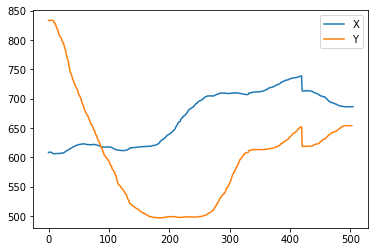

In [116]:
pd.DataFrame({ 'X':df['X'],  'Y':df['Y']}).plot()

## Q.3.

Count how many hand lifts were in the drawing

<AxesSubplot:>

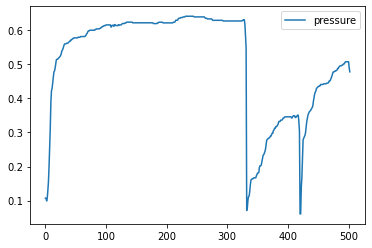

In [114]:
pd.DataFrame({ 'pressure':df[' Pressure']}).plot()

## Q.4.

(bonus)
4. לבדוק האם הצורה פתוחה או סגורה )בונוס - רק לגבי צורות מסוימות(